In [37]:
import pandas as pd
import seaborn as sns
import requests
import numpy as np
import re

In [38]:
#DATA SET 1 - MOVIE DATA
moviesDF = pd.read_csv("movie_statistic_dataset.csv")
moviesDF

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,2004-05-07,Documentary,100.0,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078.0,6.017902,65000,11529368,22233808
4376,The Brothers McMullen,1995-08-09,"Comedy,Drama,Romance",98.0,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986.0,4.231464,50000,10426506,10426506
4377,Gabriela,2001-03-16,"Drama,Romance",93.0,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593.0,2.526405,50000,2335352,2335352
4378,Tiny Furniture,2010-11-12,"Comedy,Drama,Romance",98.0,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595.0,4.242085,50000,391674,424149


In [39]:
# creation of Year column 
moviesDF["Year"] = moviesDF["production_date"].apply(lambda x: int(x[:4]))
moviesDF

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,Year
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,2004-05-07,Documentary,100.0,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078.0,6.017902,65000,11529368,22233808,2004
4376,The Brothers McMullen,1995-08-09,"Comedy,Drama,Romance",98.0,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986.0,4.231464,50000,10426506,10426506,1995
4377,Gabriela,2001-03-16,"Drama,Romance",93.0,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593.0,2.526405,50000,2335352,2335352,2001
4378,Tiny Furniture,2010-11-12,"Comedy,Drama,Romance",98.0,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595.0,4.242085,50000,391674,424149,2010


In [40]:
# get average runtime, budget
avgrt = moviesDF.groupby("Year").agg({"runtime_minutes":np.mean})
avgbud = moviesDF.groupby("Year").agg({"Production budget $":np.mean})

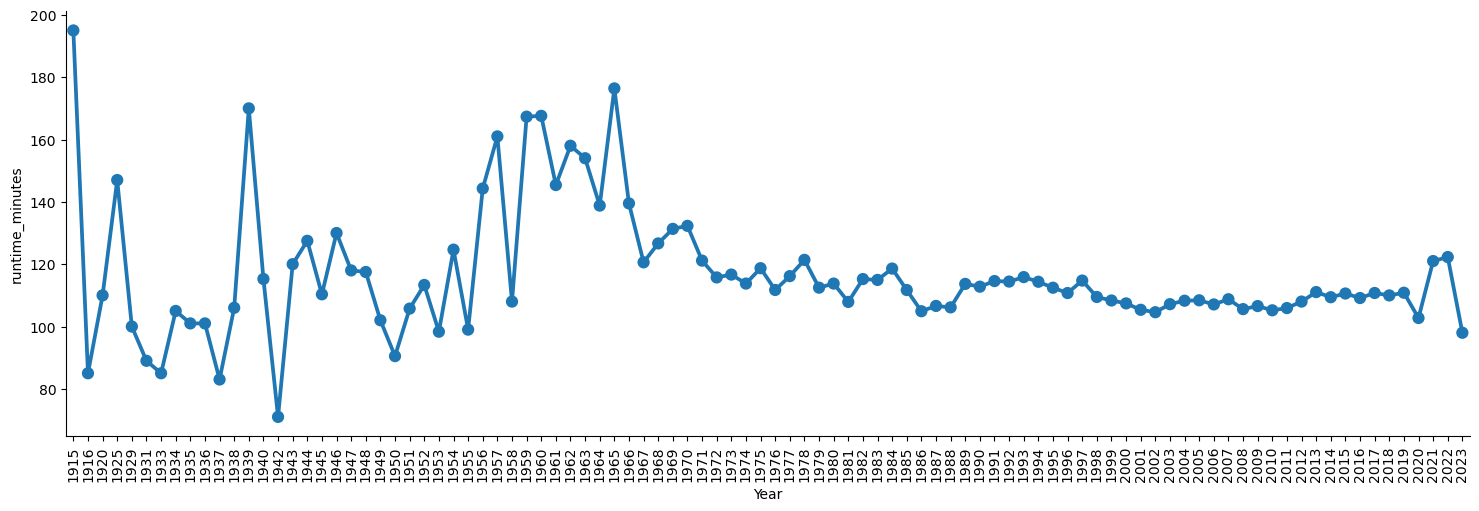

In [41]:
# plot of average runtime per year
sns.catplot(data=avgrt.reset_index(),x="Year",y="runtime_minutes",aspect=3,kind="point").set_xticklabels(rotation=90)

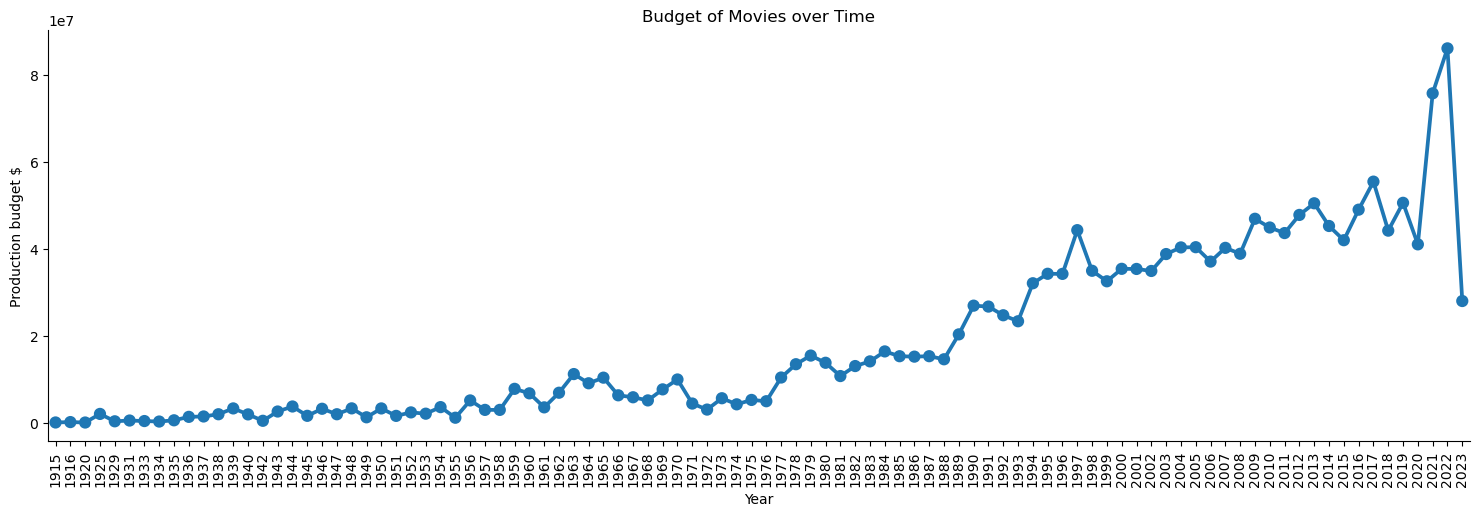

In [42]:
# plot of average budget per year
budplt = sns.catplot(data=avgbud.reset_index(),x="Year",y="Production budget $",aspect=3,kind="point").set_xticklabels(rotation=90)
budplt.set(xlabel="Year",ylabel="Production budget $",title="Budget of Movies over Time")

[Text(0.5, 0, 'Production budget $'),
 Text(0, 0.5, 'Runtime'),
 Text(0.5, 1.0, 'Budget vs Runtime')]

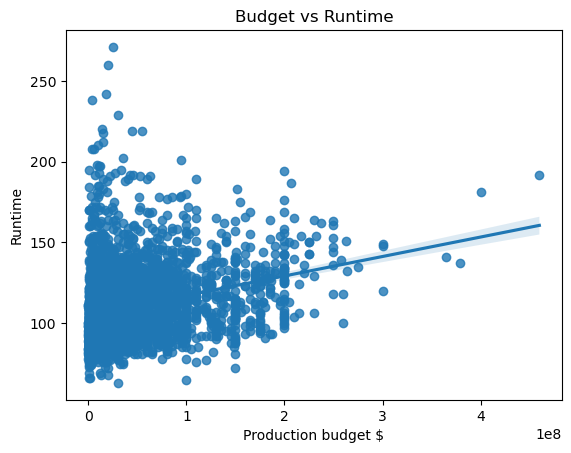

In [43]:
# plot of budget vs runtime
bud_min = sns.regplot(data=moviesDF,x="Production budget $",y="runtime_minutes")
bud_min.set(xlabel="Production budget $",ylabel="Runtime",title="Budget vs Runtime")

[Text(0.5, 0, 'Runtime'),
 Text(0, 0.5, 'Rating (IMDB)'),
 Text(0.5, 1.0, 'Runtime vs Rating')]

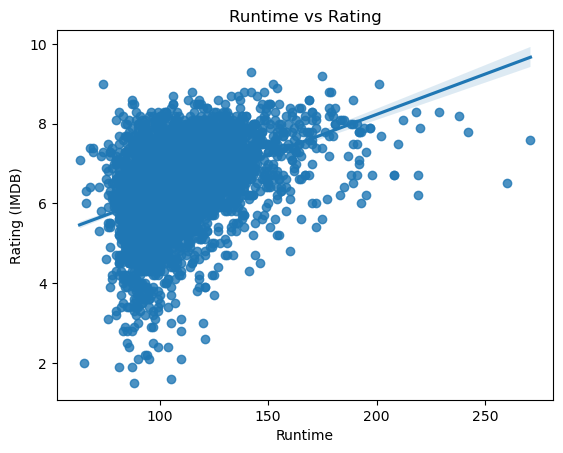

In [44]:
# plot of runtime vs average rating
rt_ratplt = sns.regplot(data=moviesDF,y="movie_averageRating",x="runtime_minutes")
rt_ratplt.set(xlabel="Runtime",ylabel="Rating (IMDB)",title="Runtime vs Rating")

In [45]:
# get top 2000 grossers and top 20000 ratings
topgrossers = moviesDF.sort_values("Worldwide gross $",ascending=False).head(2000)["movie_title"]
topratings = moviesDF.sort_values("movie_averageRating",ascending=False).head(2000)["movie_title"]

# create new column of DF accordingly
moviesDF["top$"] = moviesDF["movie_title"].apply(lambda x: x in list(topgrossers))
moviesDF["top_rat"] = moviesDF["movie_title"].apply(lambda x: x in list(topratings))

[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Top 50% Rated Movie Runtime')]

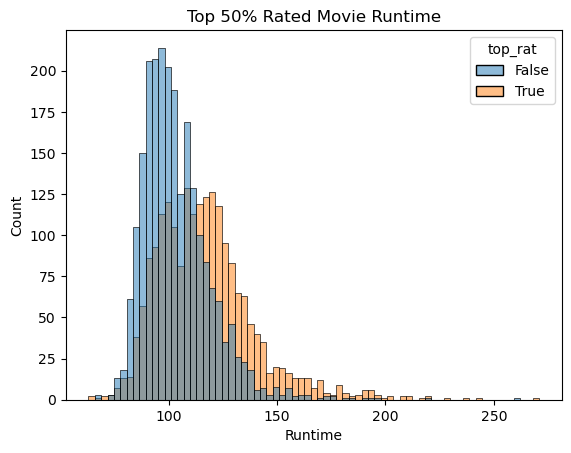

In [46]:
# plot of rt minutes split based on top 2000 ratings
tr_plt = sns.histplot(data=moviesDF,x="runtime_minutes",hue="top_rat")
tr_plt.set(xlabel="Runtime",title="Top 50% Rated Movie Runtime")

[Text(0.5, 0, 'Runtime'),
 Text(0, 0.5, 'Wordwide gross $'),
 Text(0.5, 1.0, 'Runtime vs Gross')]

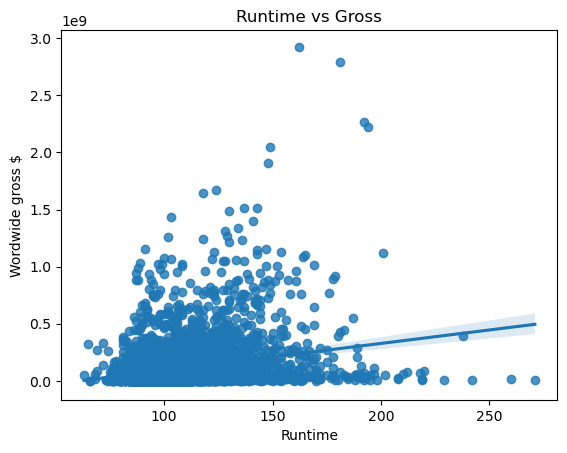

In [47]:
# plot of runtime vs gross
rt_grplt = sns.regplot(data=moviesDF,y="Worldwide gross $",x="runtime_minutes")
rt_grplt.set(xlabel="Runtime",ylabel="Wordwide gross $",title="Runtime vs Gross")

[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Top 50% Grossing Movie Runtime')]

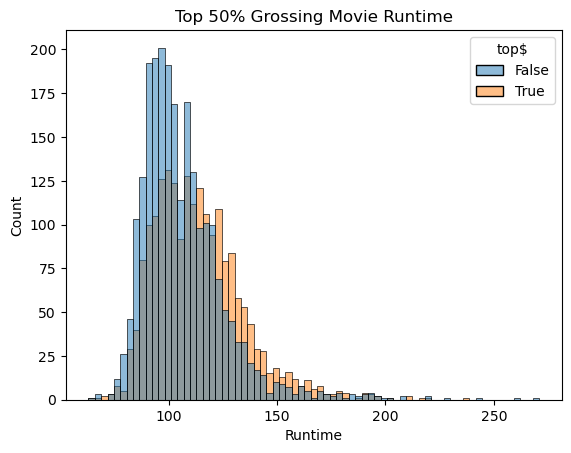

In [48]:
# plot of rt minutes split based on top 2000 gross
tmon_plt = sns.histplot(data=moviesDF,x="runtime_minutes",hue="top$")
tmon_plt.set(xlabel="Runtime",title="Top 50% Grossing Movie Runtime")

In [49]:
# DATA SET 2 - OSCARS

oscar_df = pd.read_csv("the_oscar_award.csv")

oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


In [50]:
# create data frame of oscar movies in other DF so as to get runtime, rating, and gross numbers

oscar_mov_df = pd.DataFrame({})

for x in oscar_df["film"]:
    if x in list(moviesDF["movie_title"]):
        mov_df = moviesDF[["movie_title","runtime_minutes","movie_averageRating","Worldwide gross $","Year"]].loc[moviesDF["movie_title"]==x]
        oscar_mov_df = pd.concat([oscar_mov_df,mov_df])

In [51]:
oscar_mov_df = oscar_mov_df.sort_values("runtime_minutes",ascending=False)

oscar_mov_df

,movie_title,runtime_minutes,movie_averageRating,Worldwide gross $,Year
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
...,...,...,...,...,...
4235,Bambi,69.0,7.3,268000000,1942
4337,She Done Him Wrong,66.0,6.3,2200000,1933
376,The Hunchback of Notre Dame,65.0,2.0,325500000,1996
376,The Hunchback of Notre Dame,65.0,2.0,325500000,1996


[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Oscar Runtimes')]

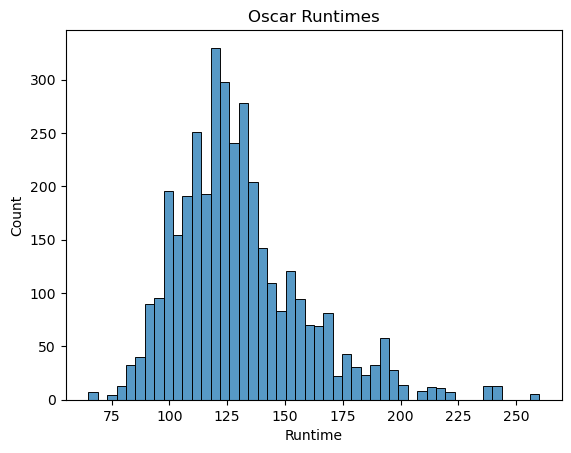

In [52]:
# Oscar runtime plot

oscplt = sns.histplot(data=oscar_mov_df,x="runtime_minutes")
oscplt.set(xlabel="Runtime",title="Oscar Runtimes")

In [53]:
# new data fram for just Best Picutres

bp_df = oscar_df.loc[oscar_df["winner"]==True]
bp_df = bp_df.loc[bp_df["category"]=="BEST PICTURE"]

bp_df

,year_film,year_ceremony,ceremony,category,name,film,winner
3923,1962,1963,35,BEST PICTURE,"Sam Spiegel, Producer",Lawrence of Arabia,True
4049,1963,1964,36,BEST PICTURE,"Tony Richardson, Producer",Tom Jones,True
4173,1964,1965,37,BEST PICTURE,"Jack L. Warner, Producer",My Fair Lady,True
4295,1965,1966,38,BEST PICTURE,"Robert Wise, Producer",The Sound of Music,True
4418,1966,1967,39,BEST PICTURE,"Fred Zinnemann, Producer",A Man for All Seasons,True
...,...,...,...,...,...,...,...
10219,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True
10350,2019,2020,92,BEST PICTURE,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True
10474,2020,2021,93,BEST PICTURE,"Frances McDormand, Peter Spears, Mollye Asher,...",Nomadland,True
10591,2021,2022,94,BEST PICTURE,"Philippe Rousselet, Fabrice Gianfermi and Patr...",CODA,True


In [54]:
# new data frame of best pictures with runtime, rating and gross info

oscar_bp_df = pd.DataFrame({})

for x in bp_df["film"]:
    if x in list(moviesDF["movie_title"]):
        movbp_df = moviesDF[["movie_title","runtime_minutes","movie_averageRating","Worldwide gross $","Year"]].loc[moviesDF["movie_title"]==x]
        oscar_bp_df = pd.concat([oscar_bp_df,movbp_df])

oscar_bp_df

,movie_title,runtime_minutes,movie_averageRating,Worldwide gross $,Year
2754,Lawrence of Arabia,218.0,8.3,69995047,1962
4177,Tom Jones,129.0,6.4,37600000,1963
2617,My Fair Lady,170.0,7.8,72072607,1964
3384,The Sound of Music,172.0,8.1,286214195,1965
3851,A Man for All Seasons,120.0,7.7,28350000,1966
4042,In the Heat of the Night,110.0,7.9,24407647,1967
3159,Oliver!,153.0,7.4,37402877,1968
3862,Midnight Cowboy,113.0,7.8,44796329,1969
2998,Patton,172.0,7.9,62500000,1970
4034,The French Connection,104.0,7.7,41159421,1971


[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Oscar Best Picture Runtimes')]

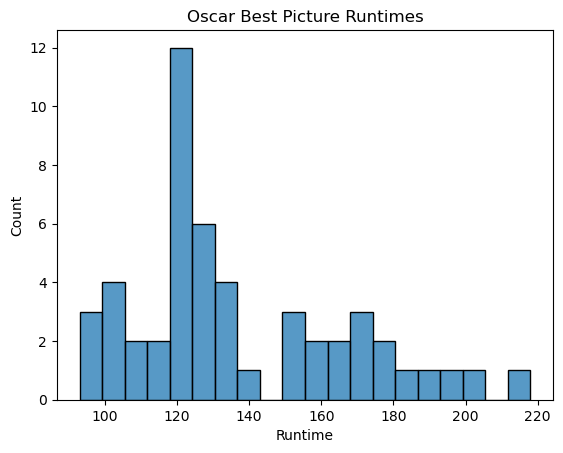

In [55]:
# plot of oscar best picture runtimes

bp_win_plt = sns.histplot(data=oscar_bp_df,x="runtime_minutes",bins=20)
bp_win_plt.set(xlabel="Runtime",title="Oscar Best Picture Runtimes")

In [56]:
# DATA SET 3 - OMDB API

key = "ae599b48"
title = "moonlight"
url = "http://www.omdbapi.com/?apikey="+key+"&t="+title+"&format=json"

query = requests.get(url).json()

query["Ratings"][1]["Value"][:2]

print("Metascore" in query)

True


In [57]:
def is_float(x):
    # I looked this up here after trying to solve it myself
    # because I was running out of api calls--> https://pythonhow.com/how/check-if-a-string-is-a-float/
    try:
        float(x)
        return True
    except ValueError:
        return False

#get info from api
def get_info(title):
    key = "ae599b48"
    url = "http://www.omdbapi.com/?apikey="+key+"&t="+title+"&format=json"

    query = requests.get(url).json()
    
    ratings = []
    
    # check if metascore, imdb, and ratings in query
    if ("Metascore" in query and "imdbRating" in query and "Ratings" in query):
        #check if floats
        if is_float(query["Metascore"]) and is_float(query["imdbRating"]) and is_float(query["Ratings"][1]["Value"][:-1]):
            ratings = [float(query["Metascore"])/10.0,float(query["imdbRating"]),float(query["Ratings"][1]["Value"][:-1])/10.0]  
    
    return ratings

In [58]:
# creation of dictionary with ratings

rat_dict = {}

for x in moviesDF["movie_title"].head(600):
    rat_dict[x] = get_info(x)
    
rat_dict

{'Avatar: The Way of Water': [],
 'Avengers: Endgame': [7.8, 8.4, 9.4],
 'Pirates of the Caribbean: On Stranger Tides': [4.5, 6.6, 3.3],
 'Avengers: Age of Ultron': [],
 'Avengers: Infinity War': [6.8, 8.4, 8.5],
 'Justice League': []}

In [59]:
# creation of new data frame with all ratings

rat_dict_2 = {}

for x in rat_dict:
    if len(rat_dict[x]) > 0:
        rat_dict_2[x] = rat_dict[x]

rat_df = pd.DataFrame(rat_dict_2)

rat_df = rat_df.T

rat_df.columns = ["Metascore","IMDB","RottenTomatoes"]

rat_df = rat_df.reset_index()

rat_df

,index,Metascore,IMDB,RottenTomatoes
0,Avengers: Endgame,7.8,8.4,9.4
1,Pirates of the Caribbean: On Stranger Tides,4.5,6.6,3.3
2,Avengers: Infinity War,6.8,8.4,8.5


In [60]:
# retrieved from pandas documetation website
rat_df2 = rat_df.melt('index', var_name='type', value_name='rating')

rt_list = []

for x in rat_df2["index"]:
    if x in list(moviesDF["movie_title"]):
        rt_list.append(float(list(moviesDF.loc[moviesDF["movie_title"]==x]["runtime_minutes"])[0]))

rat_df2["runtime"] = rt_list
rat_df2

,index,type,rating,runtime
0,Avengers: Endgame,Metascore,7.8,181.0
1,Pirates of the Caribbean: On Stranger Tides,Metascore,4.5,137.0
2,Avengers: Infinity War,Metascore,6.8,149.0
3,Avengers: Endgame,IMDB,8.4,181.0
4,Pirates of the Caribbean: On Stranger Tides,IMDB,6.6,137.0
5,Avengers: Infinity War,IMDB,8.4,149.0
6,Avengers: Endgame,RottenTomatoes,9.4,181.0
7,Pirates of the Caribbean: On Stranger Tides,RottenTomatoes,3.3,137.0
8,Avengers: Infinity War,RottenTomatoes,8.5,149.0


[Text(0.5, 0, 'Runtime'),
 Text(0, 0.5, 'Rating'),
 Text(0.5, 1.0, 'Runtime vs Rating')]

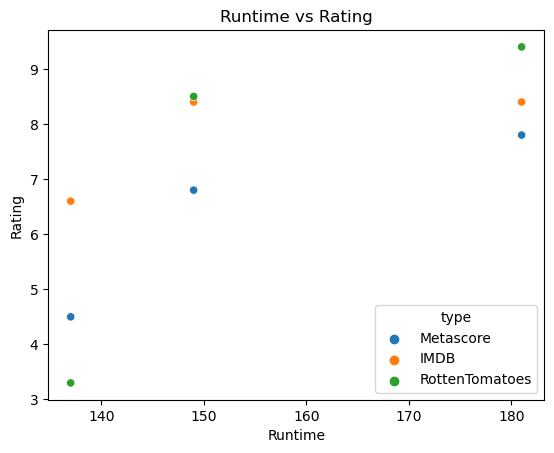

In [61]:
# plot of runtime vs rating based on ratings
rat_plt = sns.scatterplot(data=rat_df2,x="runtime",y="rating",hue="type")
rat_plt.set(xlabel="Runtime",ylabel="Rating",title="Runtime vs Rating")

In [62]:
# creation of genre list
moviesDF["genre_list"] = moviesDF["genres"].apply(lambda x: x.split(","))

agg_dict = {}

# creation of new dataframe holding average runtime, rating, and gross for each genre

# loop through movies
for x in range(len(moviesDF)):
    # get row
    row = moviesDF.loc[x]
    for y in row["genre_list"]:
        if y != "\\N":
            # add to count (first spot in array), total runtime, (second), total rating (third), and total gross
            if y in agg_dict:
                agg_dict[y][0] += 1
                
                agg_dict[y][1] += row["runtime_minutes"]
                agg_dict[y][2] += row["movie_averageRating"]
                agg_dict[y][3] += row["Worldwide gross $"]
            else:
                agg_dict[y] = []
                agg_dict[y].append(1)
                agg_dict[y].append(row["runtime_minutes"])
                agg_dict[y].append(row["movie_averageRating"])
                agg_dict[y].append(row["Worldwide gross $"])
                
# get average runtime, rating, and total gross for each genre
for x in agg_dict:
    agg_dict[x][1] /= agg_dict[x][0]
    agg_dict[x][2] /= agg_dict[x][0]
    agg_dict[x][3] /= agg_dict[x][0]
                
agg_df = pd.DataFrame(agg_dict)

# looked up how to do transpose on pandas website
agg_df = agg_df.T

agg_df = agg_df.sort_values(0,ascending=False).reset_index()

agg_df

,index,0,1,2,3
0,Drama,2210.0,115.839367,6.707511,7.344272e+07
1,Comedy,1656.0,101.757246,6.176570,1.035291e+08
2,Action,1211.0,113.061932,6.297770,1.904797e+08
3,Adventure,968.0,110.934917,6.375000,2.536851e+08
4,Crime,780.0,110.428205,6.463077,7.701028e+07
5,Romance,724.0,109.995856,6.334392,6.861444e+07
6,Thriller,668.0,108.562874,6.294611,1.073479e+08
7,Horror,456.0,99.535088,5.844079,7.046433e+07
8,Mystery,409.0,108.229829,6.332518,8.567364e+07
9,Sci-Fi,379.0,112.559367,6.330079,2.242916e+08


[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Rating'),
 Text(0.5, 1.0, 'Runtime vs Rating')]

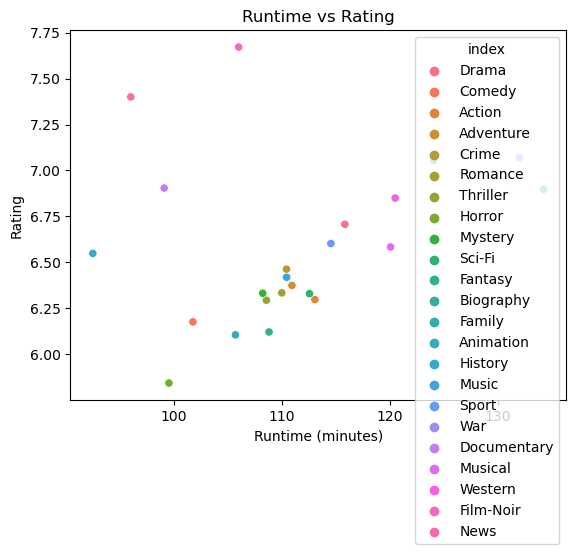

In [63]:
# plot of runtime vs rating for each genre

RTvsRat = sns.scatterplot(x=1,y=2,data=agg_df,hue="index")
RTvsRat.set(xlabel="Runtime (minutes)",ylabel="Rating",title="Runtime vs Rating")

[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Gross'),
 Text(0.5, 1.0, 'Runtime vs Gross')]

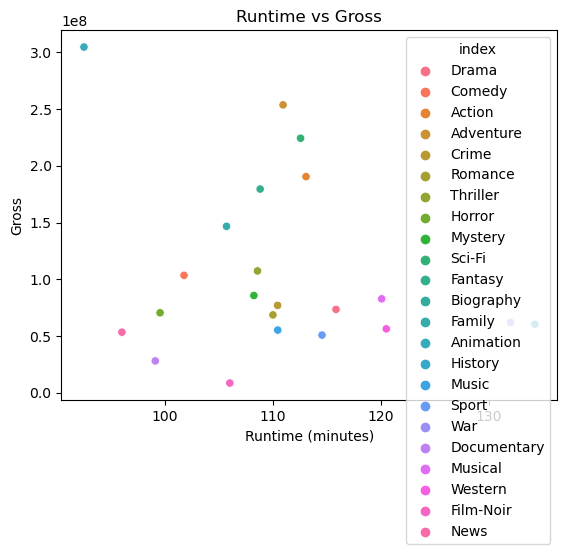

In [64]:
#plot of runtime vs gross for each genre

RTvsMon = sns.scatterplot(x=1,y=3,data=agg_df,hue="index")
RTvsMon.set(xlabel="Runtime (minutes)",ylabel="Gross",title="Runtime vs Gross")

[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Runtime by Genre')]

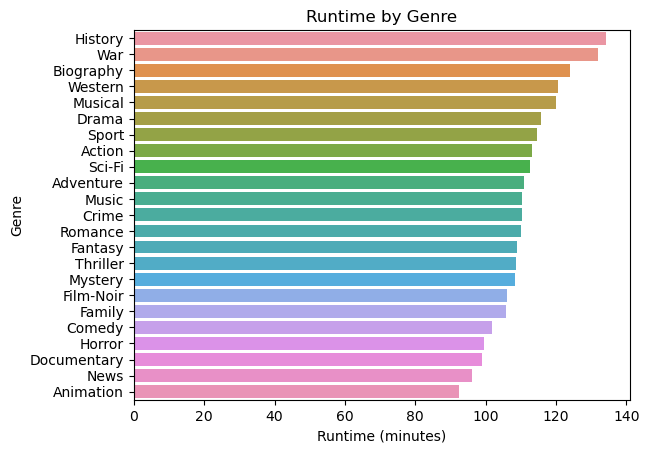

In [65]:
# plot of runtime by genre

Gen_rt =sns.barplot(data=agg_df.sort_values(1,ascending=False),x=1,y="index")
Gen_rt.set(xlabel="Runtime (minutes)",ylabel="Genre",title="Runtime by Genre")

[Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Rating by Genre')]

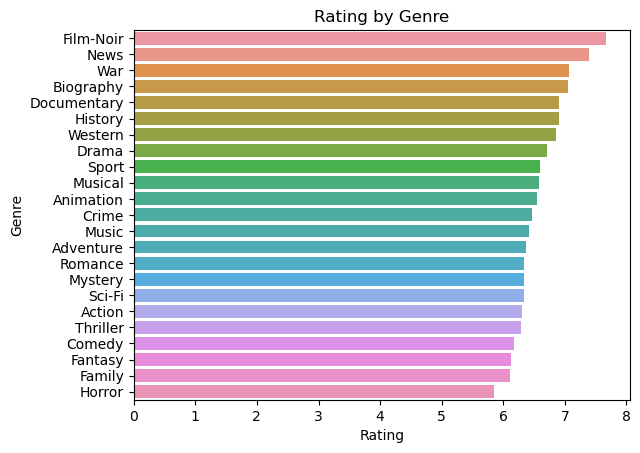

In [66]:
# plot of rating by genre

Gen_rat =sns.barplot(data=agg_df.sort_values(2,ascending=False),x=2,y="index")
Gen_rat.set(xlabel="Rating",ylabel="Genre",title="Rating by Genre")

[Text(0.5, 0, 'Gross'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Gross by Genre')]

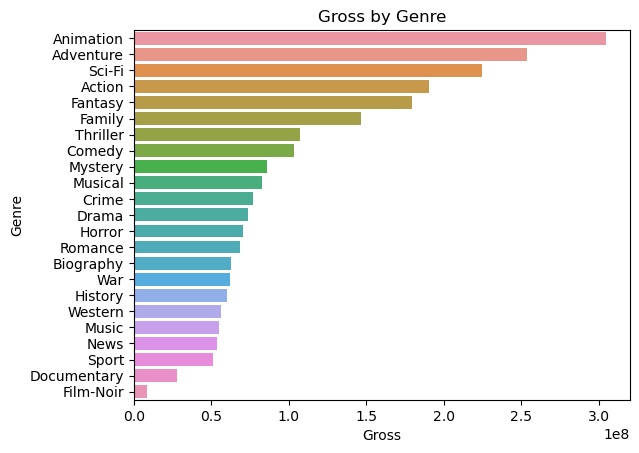

In [67]:
#plot of gross by genre

Gen_mon =sns.barplot(data=agg_df.sort_values(3,ascending=False),x=3,y="index")
Gen_mon.set(xlabel="Gross",ylabel="Genre",title="Gross by Genre")